
=== K-Means Clustering Evaluation ===
Silhouette Score: 0.4798814508199817
Calinski-Harabasz Score: 157.36015312192248
Davies-Bouldin Score: 0.7893630242997912

=== EM (GMM) Clustering Evaluation ===
Silhouette Score: 0.4751434694267145
Calinski-Harabasz Score: 141.23147584476084
Davies-Bouldin Score: 0.8867145279087012


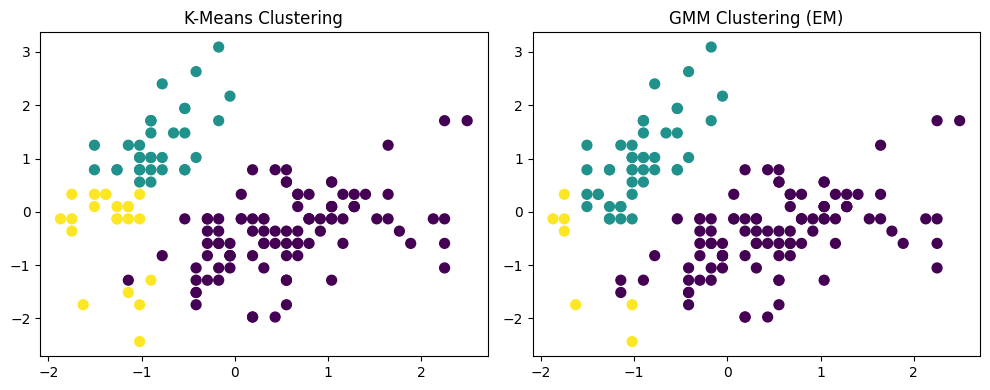

In [1]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import matplotlib.pyplot as plt
import pandas as pd

# Load dataset
iris = load_iris()
X = iris.data
true_labels = iris.target

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Gaussian Mixture Model (EM Algorithm)
gmm = GaussianMixture(n_components=3, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)

# Evaluation Function
def evaluate_clustering(name, labels):
    print(f"\n=== {name} Clustering Evaluation ===")
    print("Silhouette Score:", silhouette_score(X_scaled, labels))
    print("Calinski-Harabasz Score:", calinski_harabasz_score(X_scaled, labels))
    print("Davies-Bouldin Score:", davies_bouldin_score(X_scaled, labels))

# Evaluate both
evaluate_clustering("K-Means", kmeans_labels)
evaluate_clustering("EM (GMM)", gmm_labels)

# Visualization
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='viridis', s=50)
plt.title("K-Means Clustering")

plt.subplot(1, 2, 2)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=gmm_labels, cmap='viridis', s=50)
plt.title("GMM Clustering (EM)")

plt.tight_layout()
plt.show()
